In [14]:
#import opendatasets as od

#od.download('https://www.kaggle.com/datasets/averkij/tennessee-eastman-process-simulation-dataset')

In [15]:
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [16]:
# Only Training data is used

df_FaultFree = pyreadr.read_r(r'Dataset\\TEP_FaultFree_Training.RData')['fault_free_training']
df_Faulty = pyreadr.read_r(r'Dataset\\TEP_Faulty_Training.RData')['faulty_training']

In [17]:
DF = pd.concat([df_FaultFree,df_Faulty]) # Join both fault free and faulty dataset
DF.head()

faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  xmeas_4  \
0          0.0            1.0       1  0.25038   3674.0   4529.0   9.2320   
1          0.0            1.0       2  0.25109   3659.4   4556.6   9.4264   
2          0.0            1.0       3  0.25038   3660.3   4477.8   9.4426   
3          0.0            1.0       4  0.24977   3661.3   4512.1   9.4776   
4          0.0            1.0       5  0.29405   3679.0   4497.0   9.3381   

   xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4   xmv_5   xmv_6  \
0   26.889   42.402   2704.3  ...  53.744  24.657  62.544  22.137  39.935   
1   26.721   42.576   2705.0  ...  53.414  24.588  59.259  22.084  40.176   
2   26.875   42.070   2706.2  ...  54.357  24.666  61.275  22.380  40.244   
3   26.758   42.063   2707.2  ...  53.946  24.725  59.856  22.277  40.257   
4   26.889   42.650   2705.1  ...  53.658  28.797  60.717  21.947  39.144   

    xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
0  42.323  47.757  47.510  41.258  18.447  
1  38.554  43.692  47.427  41.359  17.194  
2  38.990  46.699  47.468  41.199  20.530  
3  38.072  47.541  47.658  41.643  18.089  
4  41.955  47.645  47.346  41.507  18.461  

[5 rows x 55 columns]

In [18]:
# Calculate summary statistics for each column
summary = DF[DF['simulationRun']==1].iloc[:,3:].describe()
print(summary)

            xmeas_1       xmeas_2       xmeas_3       xmeas_4       xmeas_5  \
count  10500.000000  10500.000000  10500.000000  10500.000000  10500.000000   
mean       0.265576   3661.241419   4505.710048      9.348456     26.904955   
std        0.143596     41.840258    103.764946      0.299329      0.235383   
min       -0.003183   3470.900000   3884.300000      7.494400     25.592000   
25%        0.225830   3636.800000   4473.000000      9.269300     26.764000   
50%        0.251195   3661.250000   4506.700000      9.352200     26.897000   
75%        0.282177   3686.500000   4545.600000      9.442225     27.056000   
max        1.005200   3820.200000   5013.300000     11.157000     28.077000   

            xmeas_6       xmeas_7       xmeas_8       xmeas_9      xmeas_10  \
count  10500.000000  10500.000000  10500.000000  10500.000000  10500.000000   
mean      42.352988   2716.501076     74.965782    120.400574      0.346336   
std        0.290591     68.489751      1.200865    

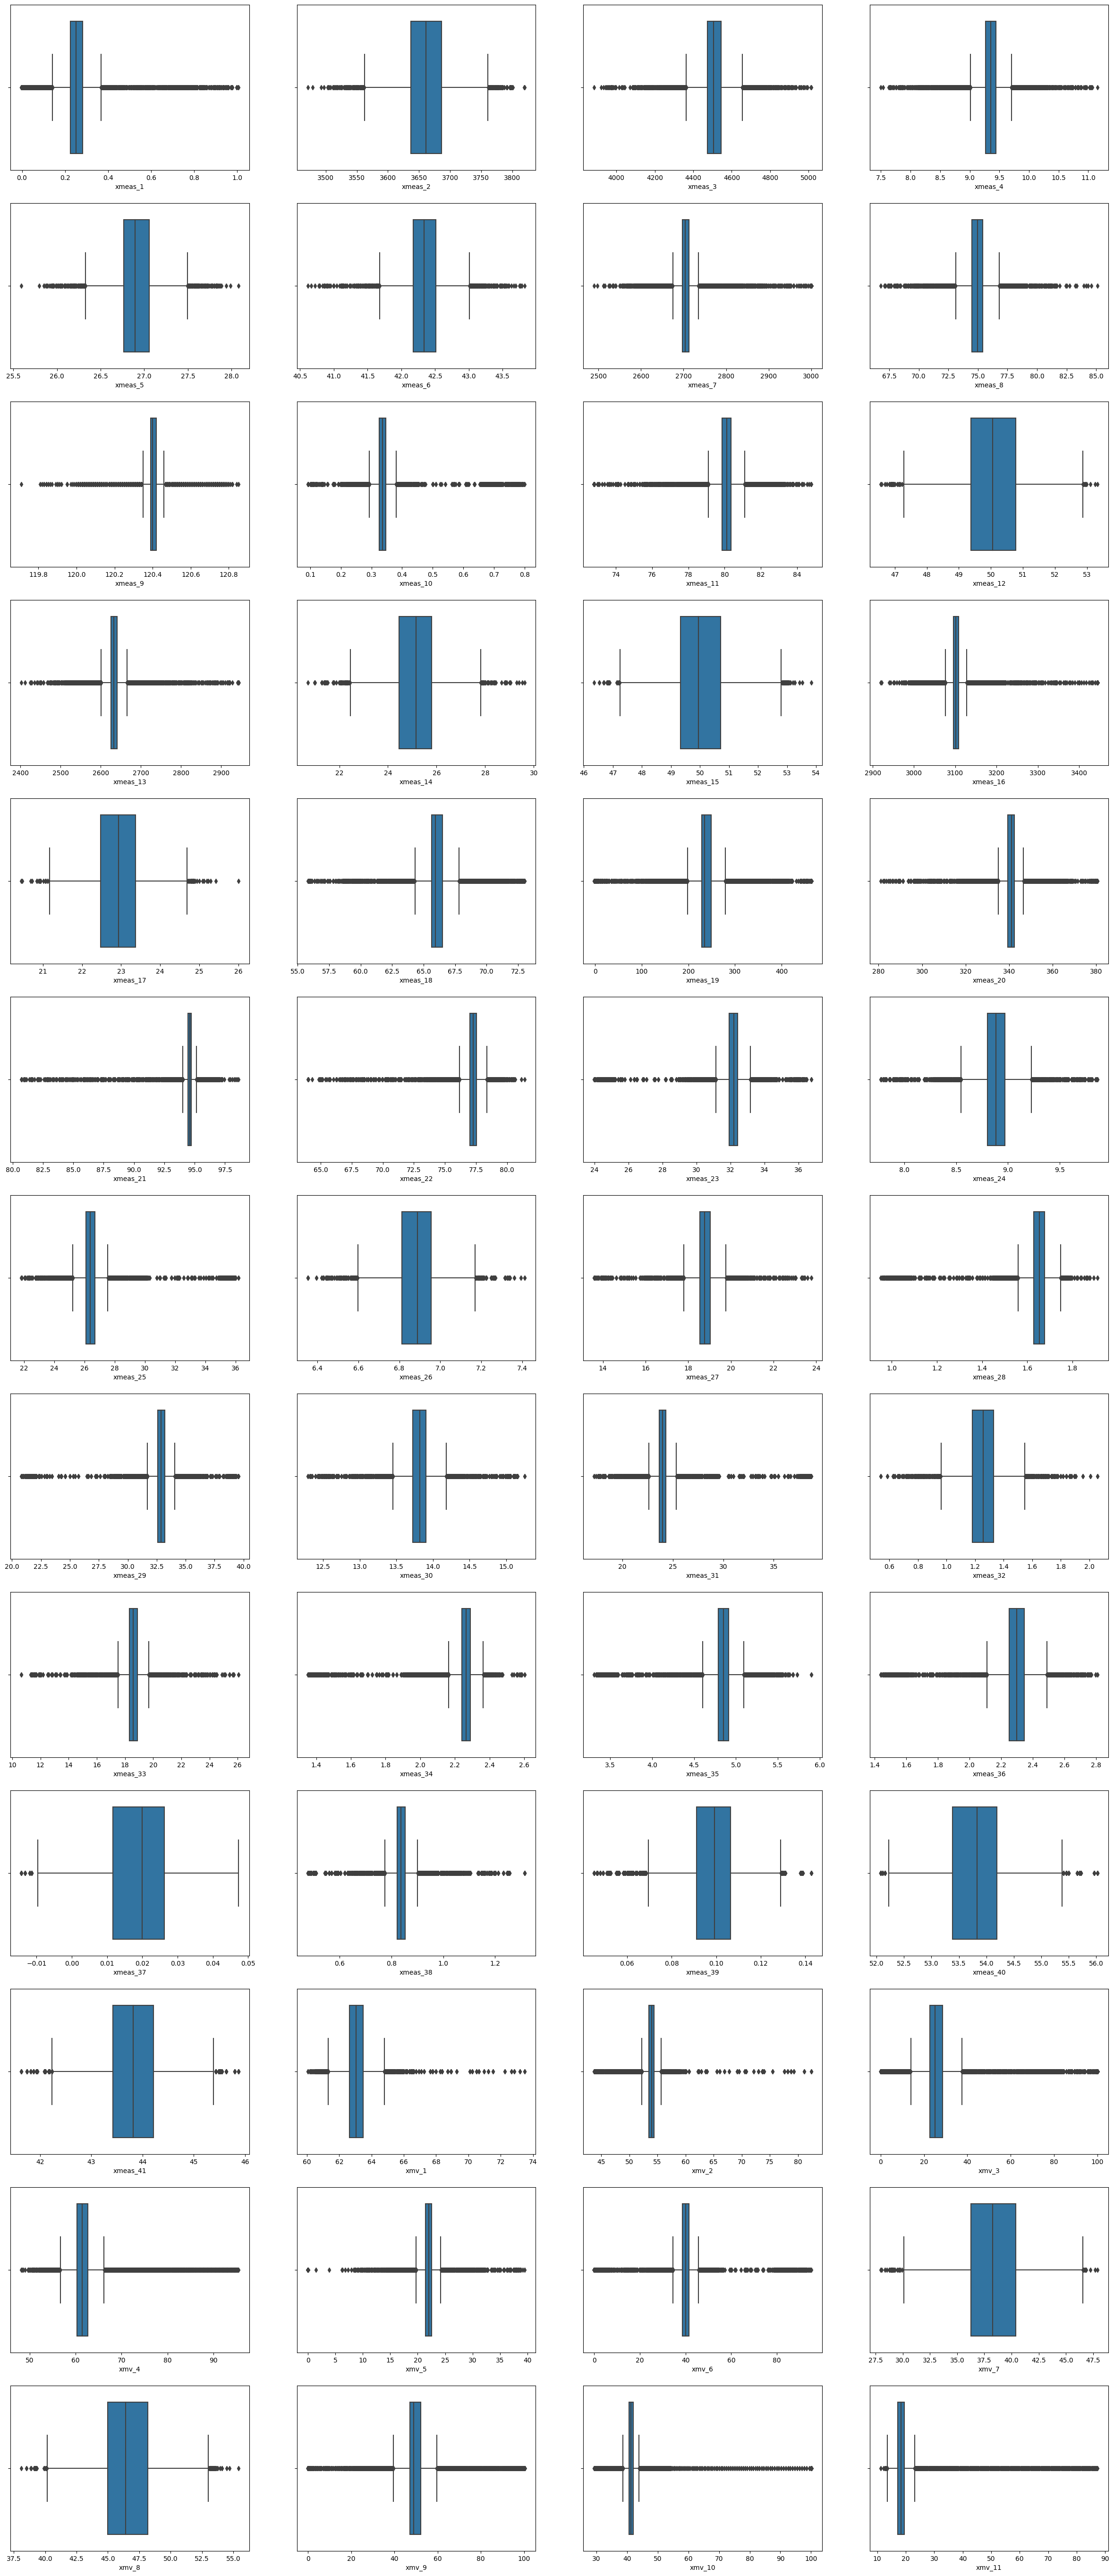

In [19]:
# Create a box plot for each variable
data = DF[DF['simulationRun']==1]
    
fig, ax = plt.subplots(13,4,figsize=(30,70))

for i,column in enumerate(data.columns[3:]):   #select all the feature columns to plot
    sns.boxplot(data=data,x=column,ax=ax.ravel()[i])

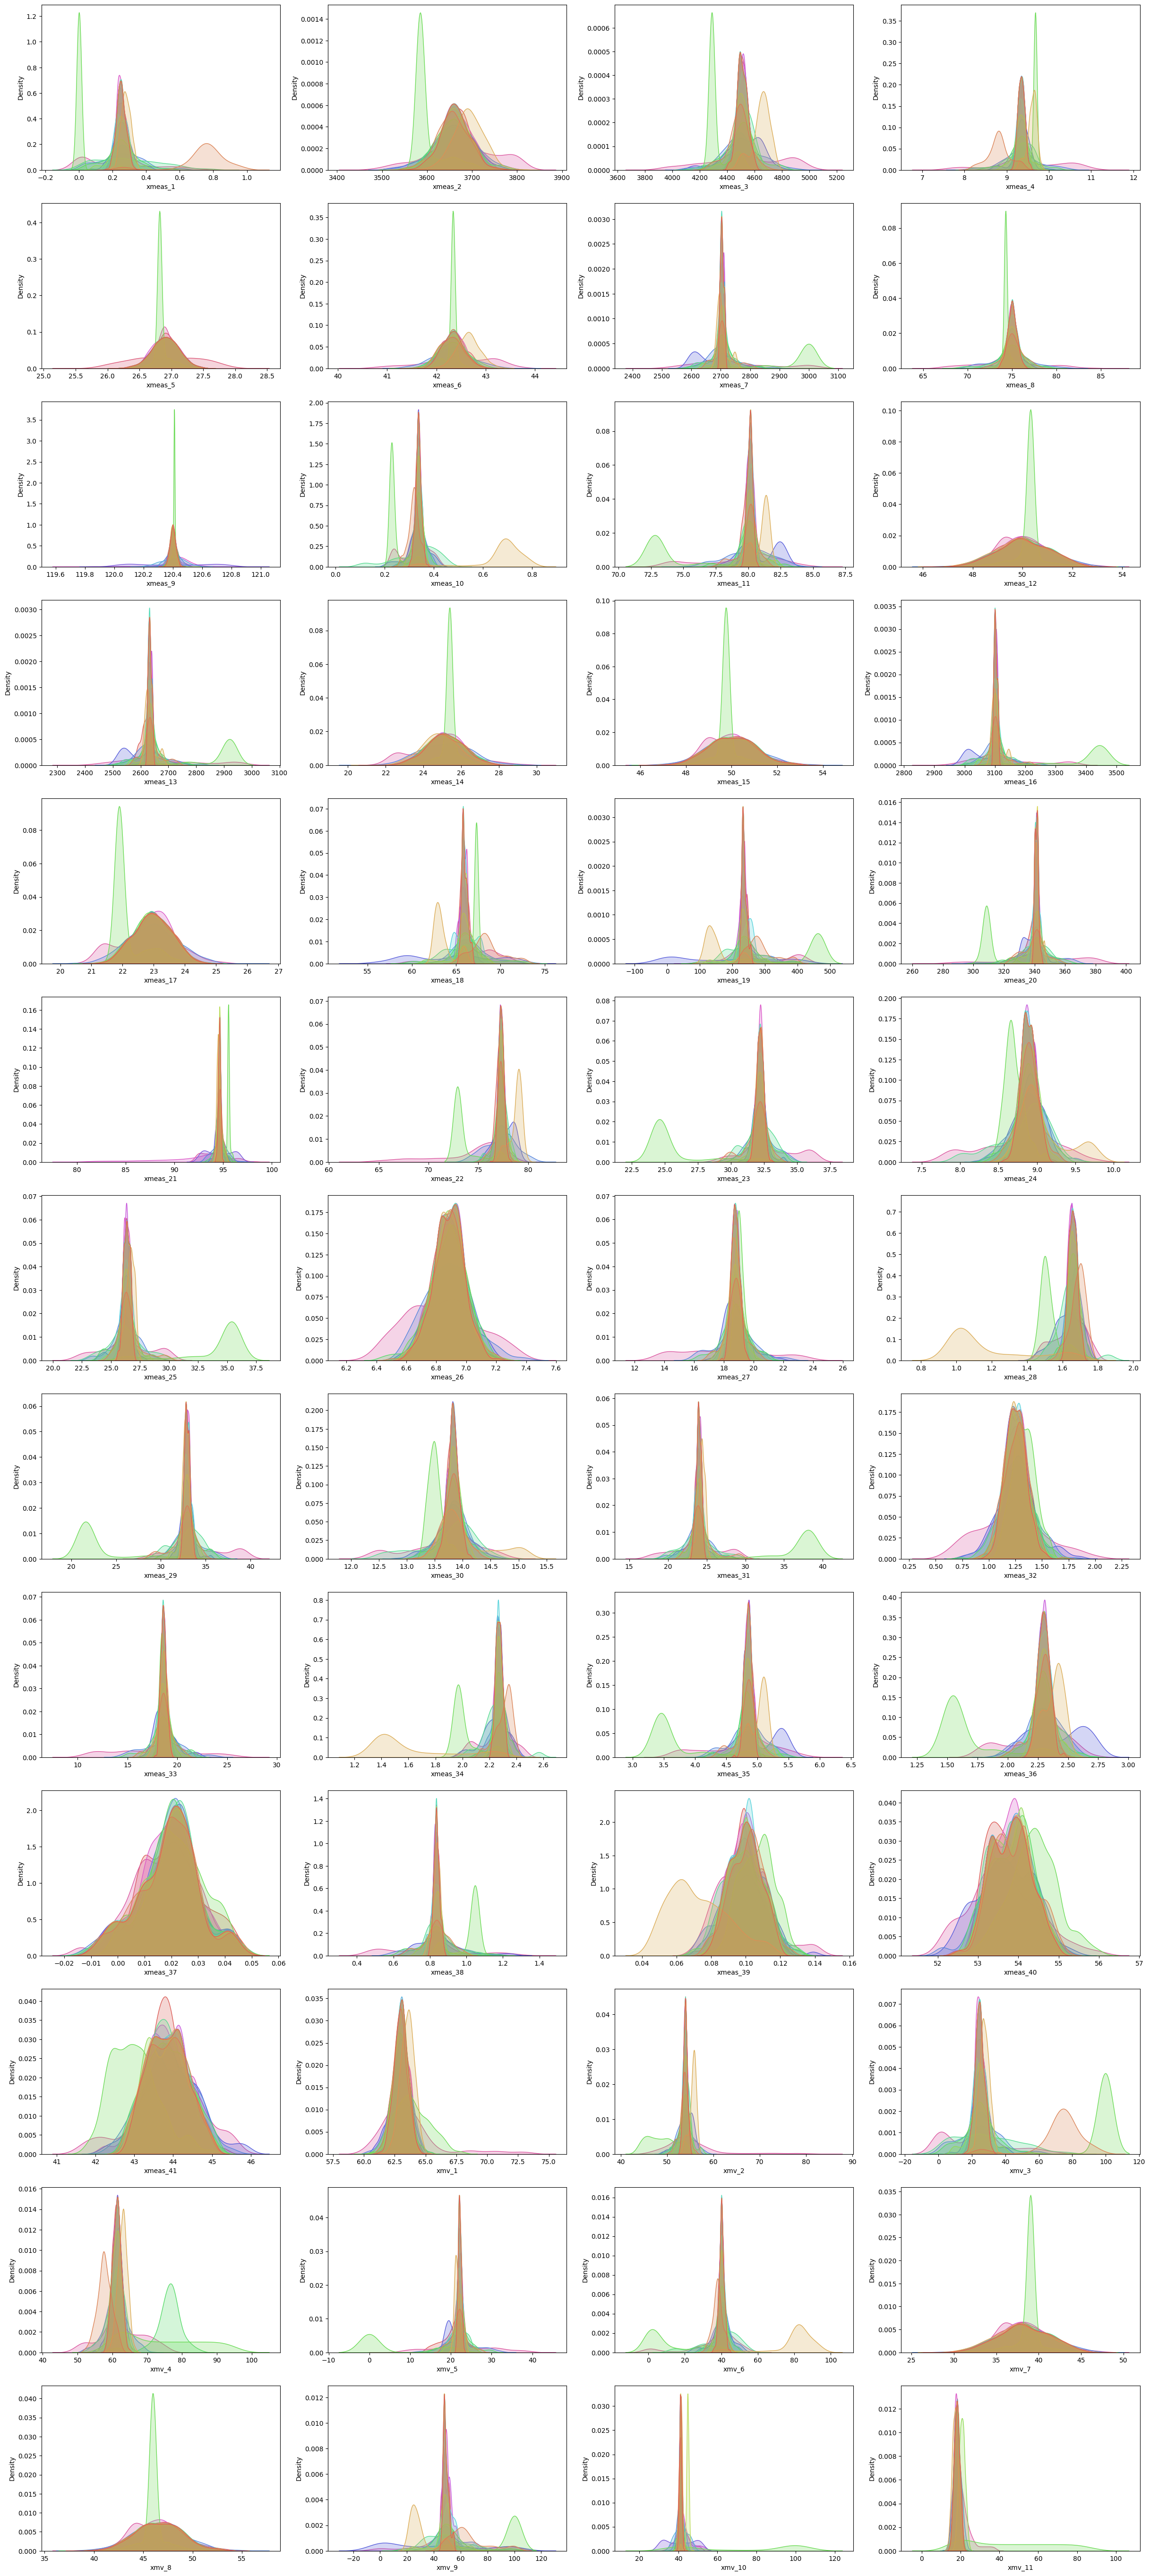

In [20]:
# KDE plot for each variable
    
fig, ax = plt.subplots(13,4,figsize=(30,70))

for i,column in enumerate(data.columns[3:]):   #select all the feature columns to plot
    sns.kdeplot(data=data, x=column, hue="faultNumber",palette="hls",ax=ax.ravel()[i],fill=True, legend=False)

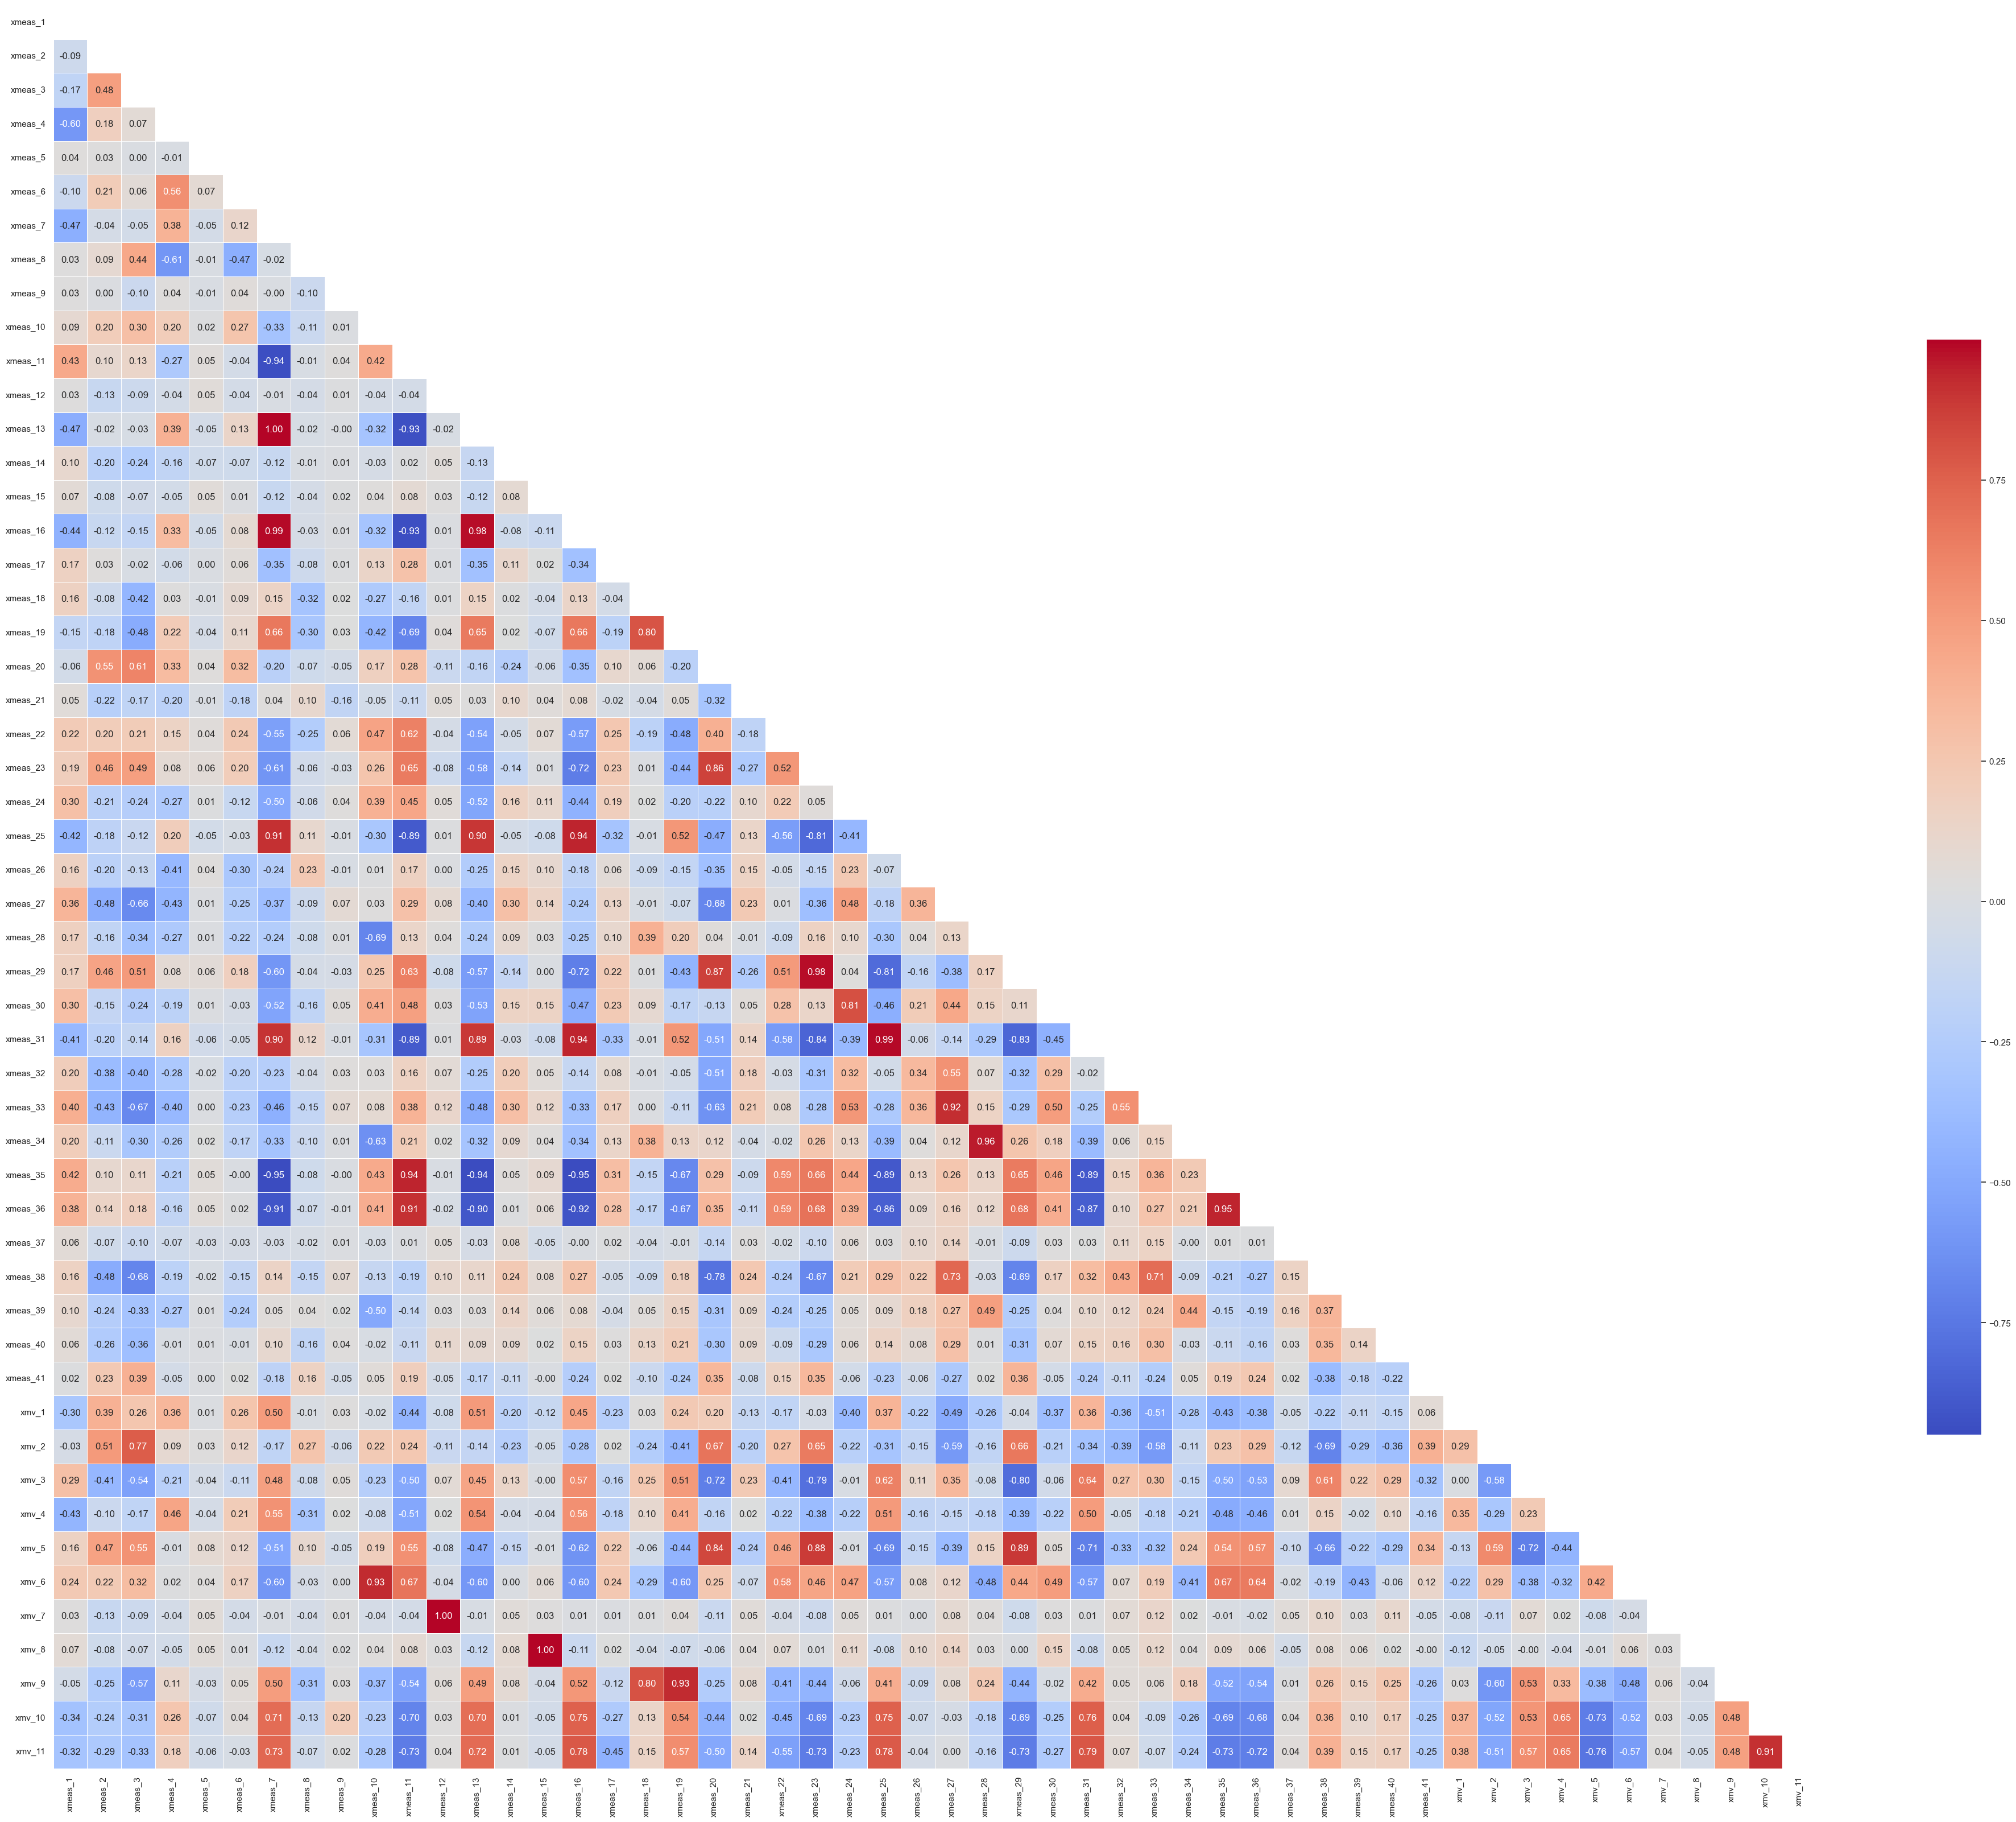

In [21]:
# Load the data into a pandas DataFrame
data = DF[DF['simulationRun']==1].iloc[:,3:]

# Calculate the correlation matrix
corr = data.corr()

# Create a heatmap with annotations
sns.set(style='white')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt='.2f',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [22]:
# Calculate the correlation matrix
corr_matrix = data.corr()

upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))

to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
print(len(to_drop)); print(to_drop)

14
['xmeas_13', 'xmeas_16', 'xmeas_25', 'xmeas_29', 'xmeas_31', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_11']


In [23]:
reduced_data = DF[(DF['simulationRun'] >1 ) & (DF['simulationRun'] <10 ) & (DF['sample']>20)]
# reduced_data = data.drop(columns=to_drop, axis=1)
reduced_data = reduced_data[reduced_data['faultNumber'] != 3]
reduced_data = reduced_data[reduced_data['faultNumber'] != 9]
reduced_data = reduced_data[reduced_data['faultNumber'] != 15]

reduced_data

faultNumber  simulationRun  sample  xmeas_1  xmeas_2  xmeas_3  xmeas_4  \
520            0.0            2.0      21  0.26775   3630.7   4512.7   9.2949   
521            0.0            2.0      22  0.26725   3645.0   4459.4   9.2806   
522            0.0            2.0      23  0.25875   3712.7   4503.8   9.4355   
523            0.0            2.0      24  0.25368   3690.8   4512.4   9.3769   
524            0.0            2.0      25  0.24452   3637.5   4494.1   9.2725   
...            ...            ...     ...      ...      ...      ...      ...   
89995         20.0            9.0     496  0.23174   3602.7   4520.7   9.4863   
89996         20.0            9.0     497  0.26673   3667.6   4516.0   9.4891   
89997         20.0            9.0     498  0.26669   3691.9   4564.8   9.4719   
89998         20.0            9.0     499  0.22821   3611.6   4452.1   9.4838   
89999         20.0            9.0     500  0.22924   3618.9   4467.4   9.3507   

       xmeas_5  xmeas_6  xmeas_7  ...   xmv_2   xmv_3   xmv_4   xmv_5   xmv_6  \
520     26.917   42.466   2701.7  ...  54.111  26.634  60.788  22.682  43.266   
521     26.676   42.548   2704.6  ...  54.749  26.683  62.394  22.758  42.948   
522     26.791   42.003   2708.2  ...  54.295  24.993  59.951  22.822  39.989   
523     26.847   42.168   2709.4  ...  54.193  25.491  62.203  22.790  39.515   
524     26.962   42.451   2706.5  ...  53.604  24.069  62.409  22.490  42.807   
...        ...      ...      ...  ...     ...     ...     ...     ...     ...   
89995   26.869   42.047   2695.8  ...  54.107  22.750  62.092  21.680  41.140   
89996   26.877   42.369   2693.7  ...  54.595  25.910  62.103  21.231  38.725   
89997   26.785   41.914   2695.7  ...  54.011  25.914  61.784  21.624  38.538   
89998   27.087   42.493   2695.2  ...  54.064  22.559  60.377  21.808  39.940   
89999   26.823   42.460   2695.6  ...  53.881  22.458  64.352  21.641  40.381   

        xmv_7   xmv_8   xmv_9  xmv_10  xmv_11  
520    38.207  48.255  46.078  40.947  17.023  
521    38.699  46.948  46.170  40.933  17.885  
522    41.240  41.206  46.144  41.592  19.710  
523    34.991  50.173  46.358  41.633  15.901  
524    38.729  43.949  46.429  41.209  18.772  
...       ...     ...     ...     ...     ...  
89995  39.175  41.601  54.087  41.359  17.983  
89996  37.875  41.960  54.366  41.151  20.015  
89997  40.539  43.952  54.396  41.246  17.528  
89998  43.467  46.659  54.639  40.640  17.407  
89999  38.895  44.061  54.705  41.521  17.757  

[69120 rows x 55 columns]

In [24]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = StandardScaler()

sc.fit(reduced_data.iloc[:,3:])


StandardScaler()

In [25]:
X = sc.transform(reduced_data.iloc[:,3:])
Y = reduced_data['faultNumber']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_enc = le.fit_transform(Y)

In [26]:
X = sc.transform(reduced_data.iloc[:,3:])
Y = reduced_data['faultNumber']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_enc = le.fit_transform(Y)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y_enc, test_size=0.2, random_state=42)

In [28]:
y_train.shape

(55296,)

In [29]:
# Import the required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Create an instance of each algorithm
logreg = LogisticRegression(max_iter=10000)
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
nb = GaussianNB()
knn = KNeighborsClassifier()
xg = xgb.XGBClassifier()

# Train the algorithms on the data
logreg.fit(x_train, y_train)
# svm.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
nb.fit(x_train, y_train)
knn.fit(x_train, y_train)
xg.fit(x_train, y_train)
 
# Use the trained models to make predictions on new data
y_pred_logreg =logreg.predict(x_test)
# y_pred_svm = svm.predict(x_test)
y_pred_dt = dt.predict(x_test)
y_pred_rf = rf.predict(x_test)
y_pred_nb = nb.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_xg = xg.predict(x_test)

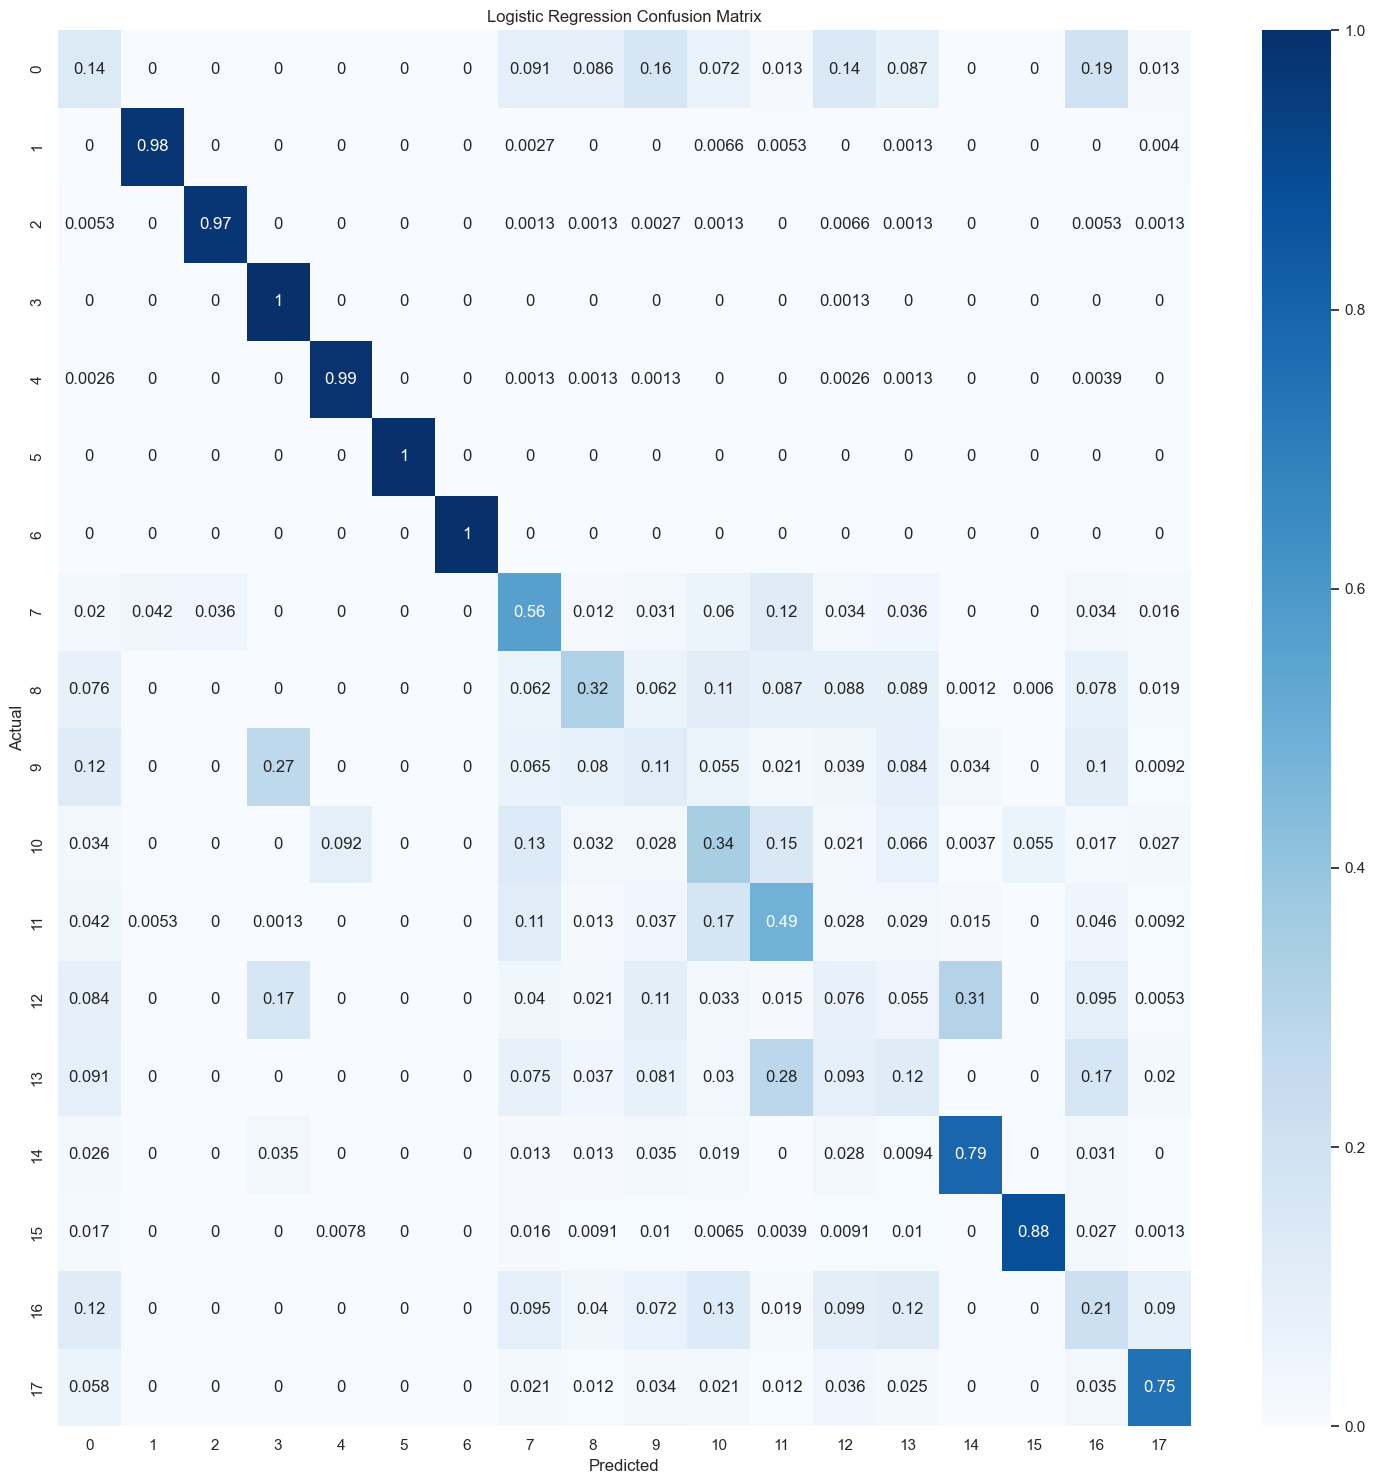

Logistic Regression accuracy_score: 0.5988859953703703


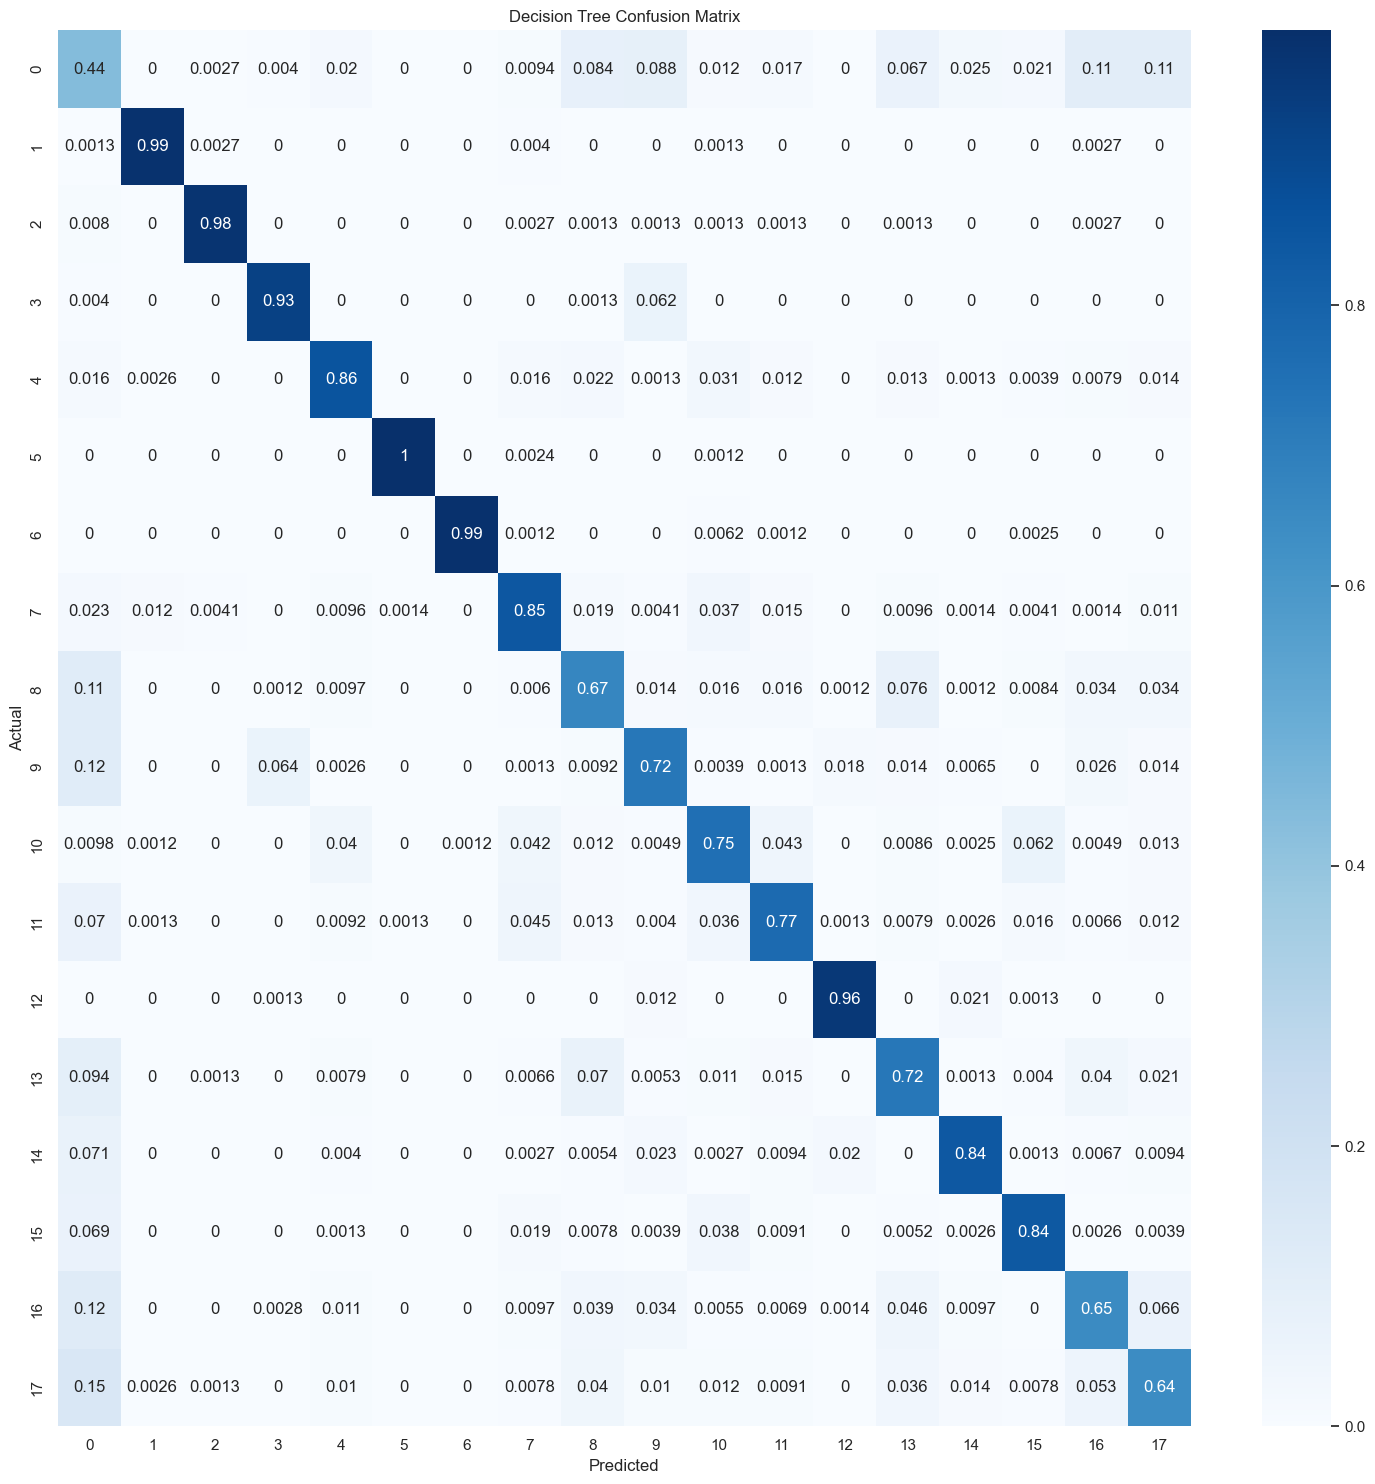

Decision Tree accuracy_score: 0.8122106481481481


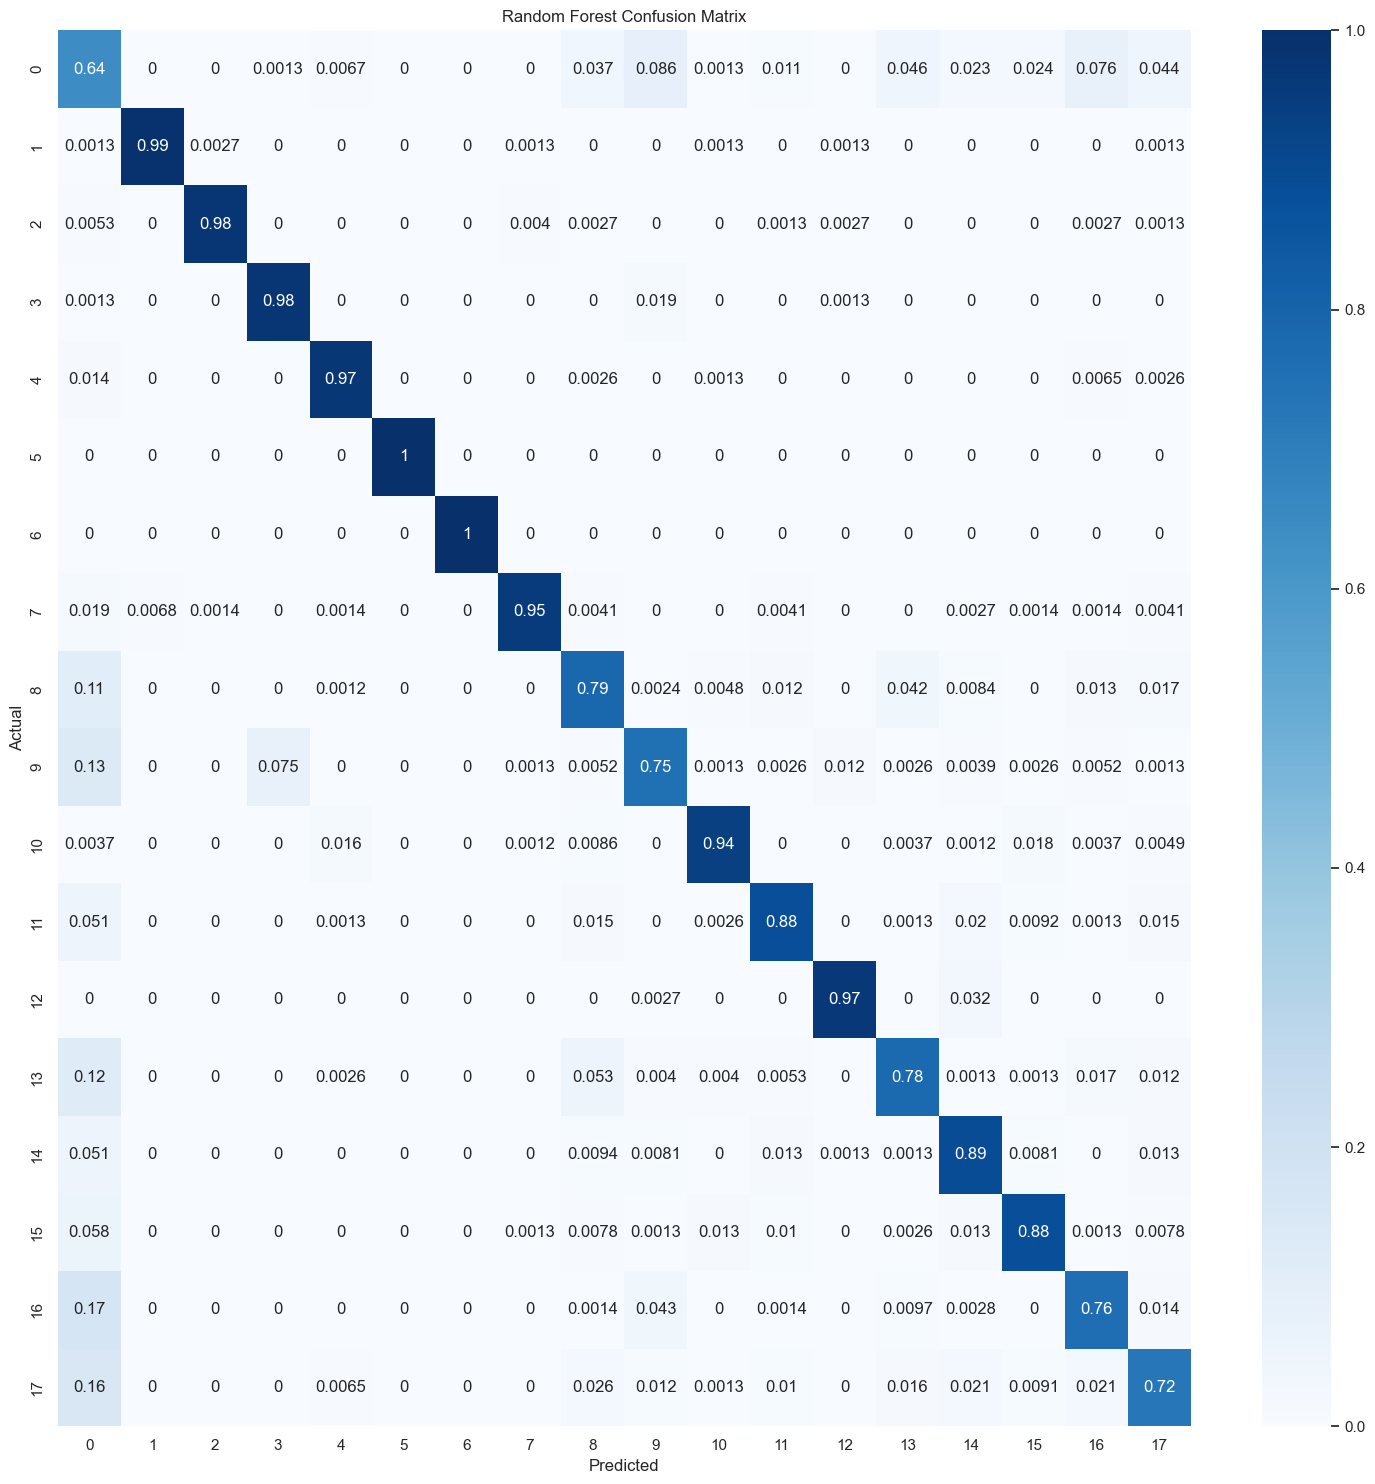

Random Forest accuracy_score: 0.8833912037037037


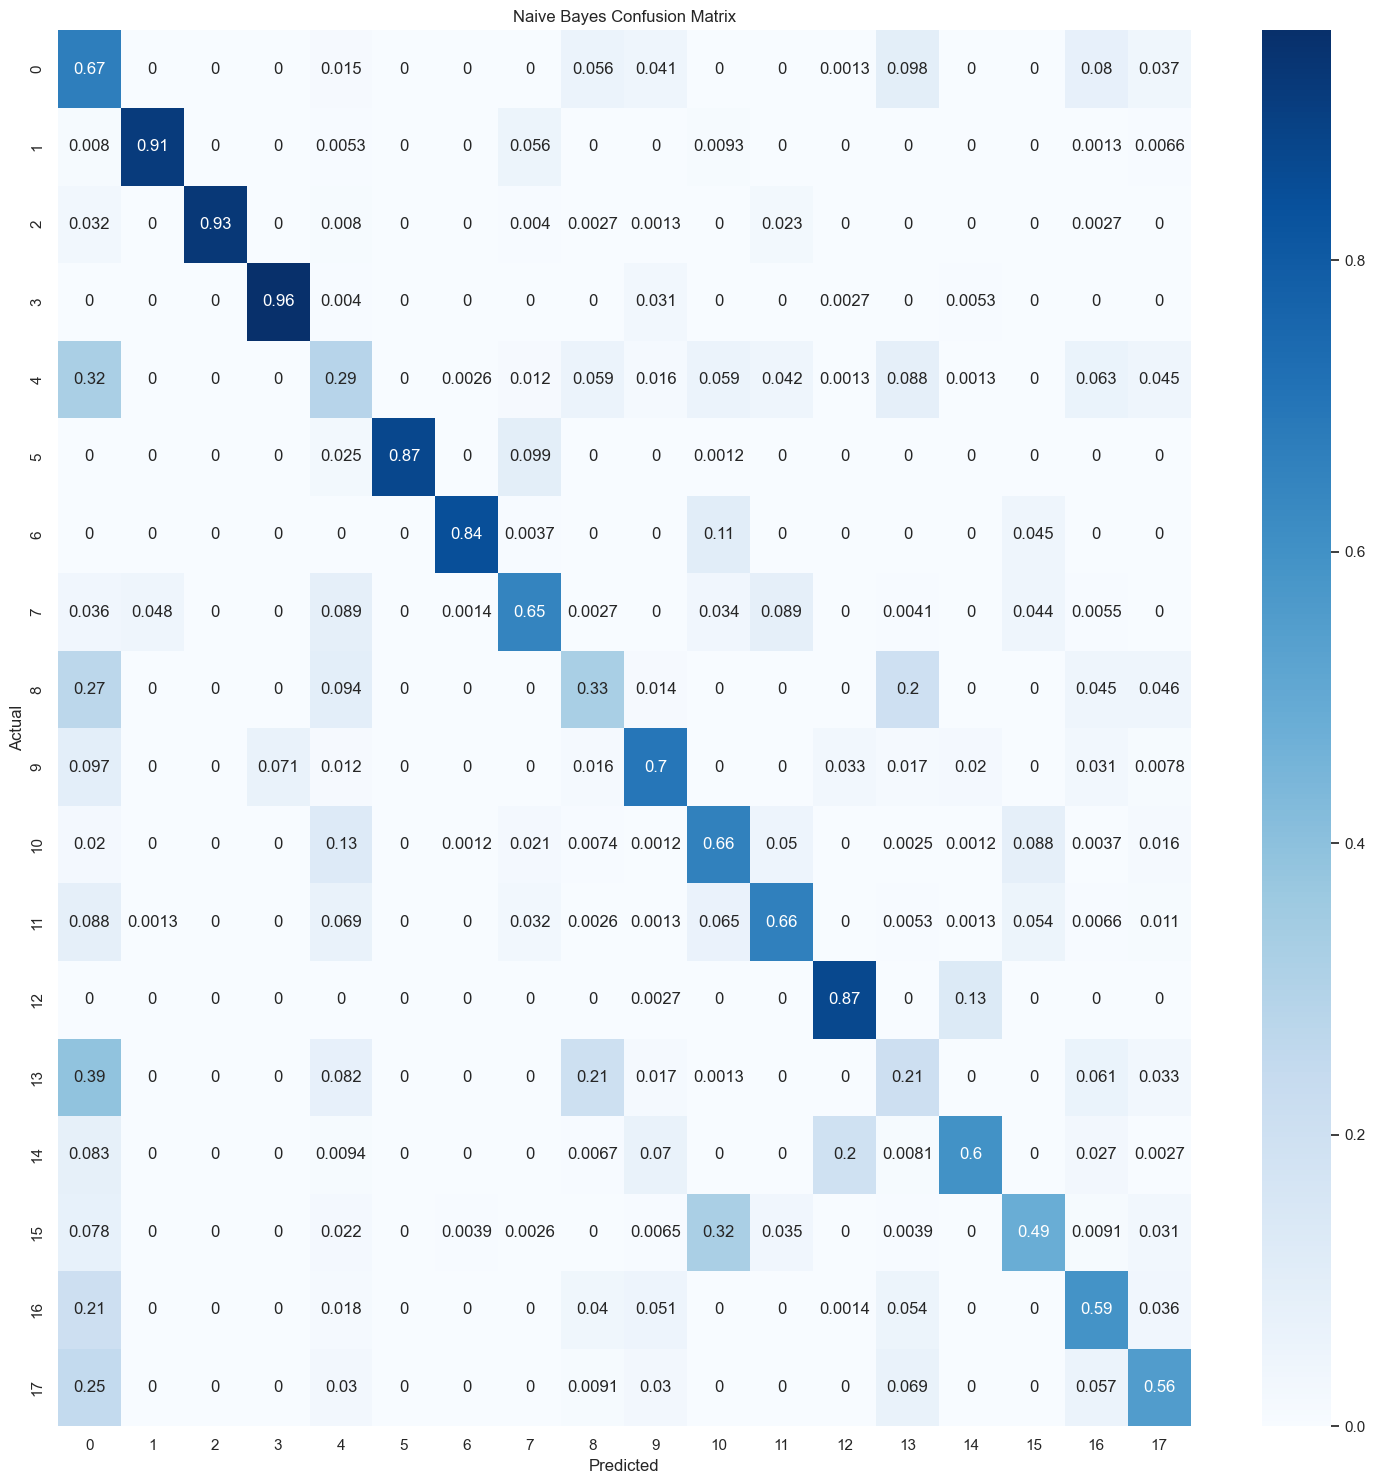

Naive Bayes accuracy_score: 0.6541521990740741


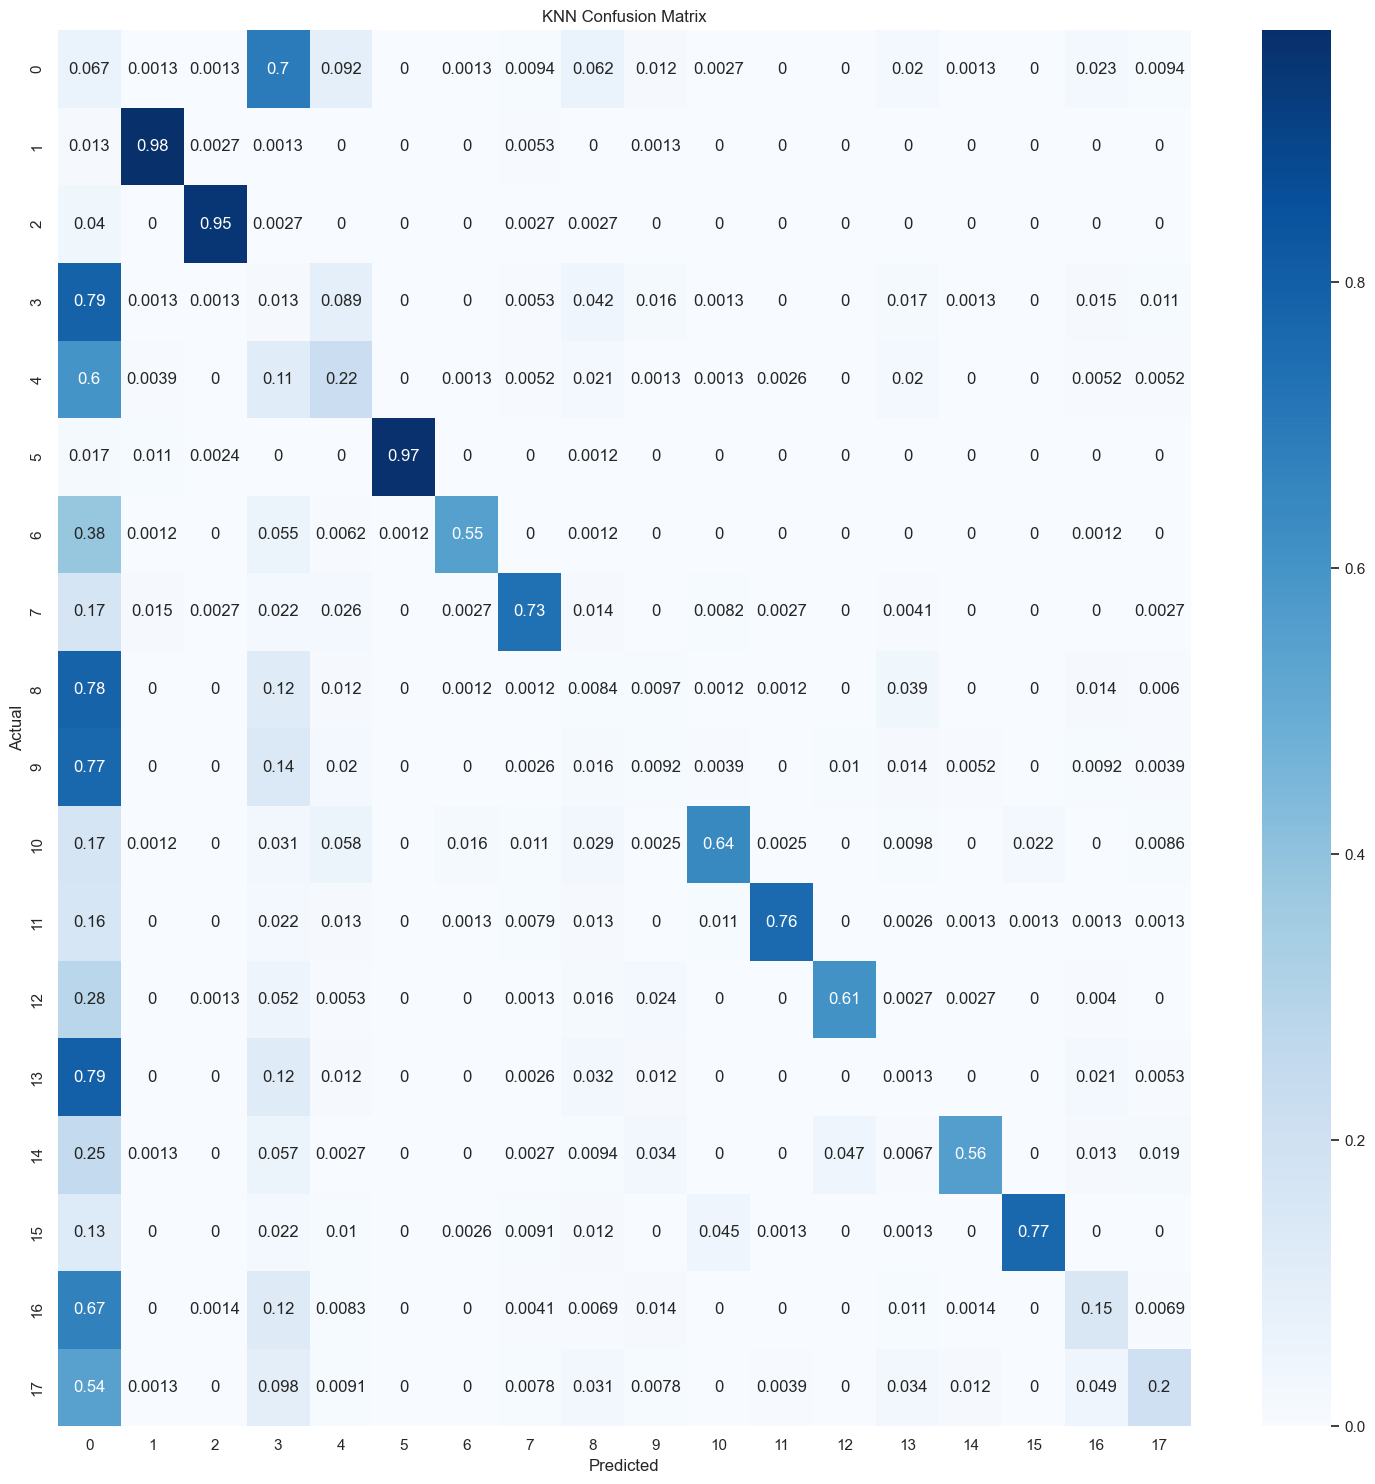

KNN accuracy_score: 0.4566695601851852


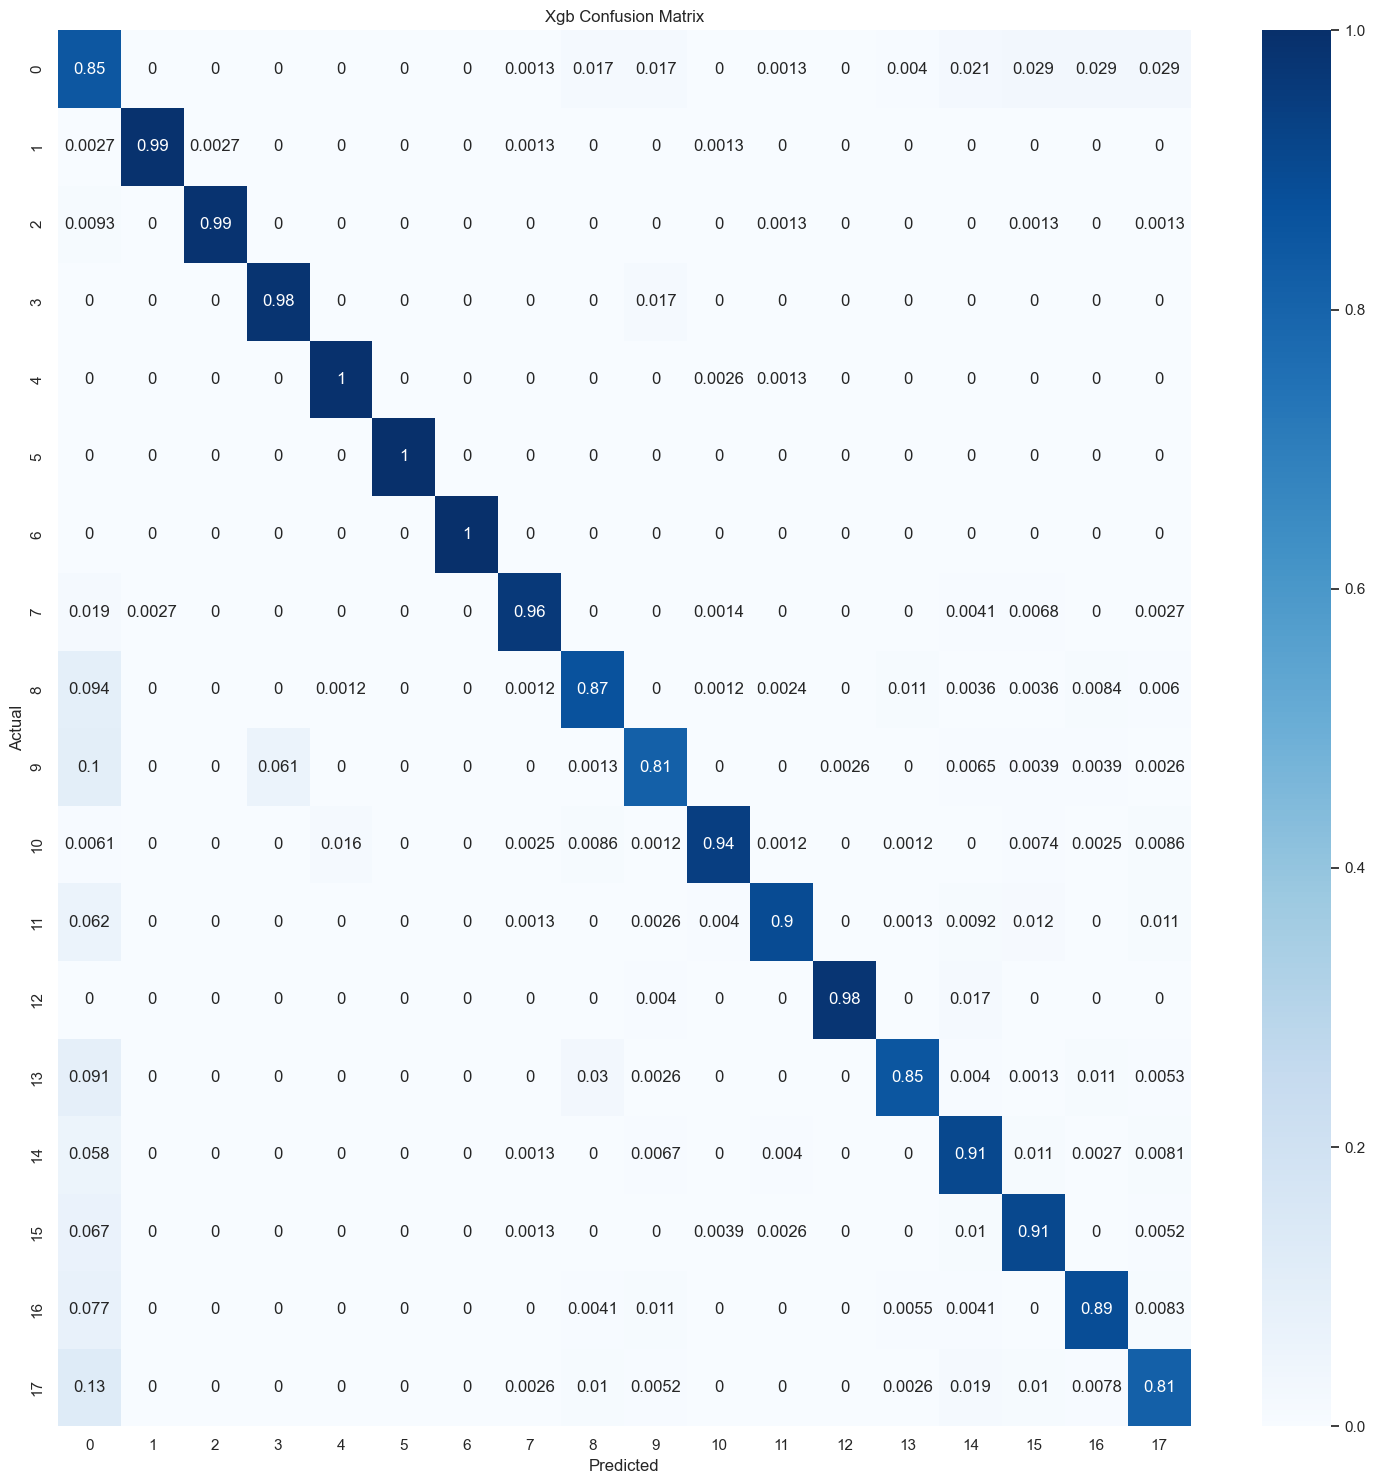

Xgb accuracy_score: 0.9252025462962963


In [30]:
# Import the required libraries
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Create a function to plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    f, ax = plt.subplots(figsize=(15, 15))
    cm = confusion_matrix(y_true, y_pred,normalize='true')
    sns.heatmap(cm, annot=True, cmap='Blues',ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_ylim(len(cm), 0)
    plt.tight_layout()
    plt.show()

# Plot the confusion matrix and print the f1 score for each algorithm
plot_confusion_matrix(y_test, y_pred_logreg, 'Logistic Regression Confusion Matrix')
print("Logistic Regression accuracy_score:", accuracy_score(y_test, y_pred_logreg))

# plot_confusion_matrix(y_test, y_pred_svm, 'SVM Confusion Matrix')
# print("SVM accuracy_score:", accuracy_score(y_test, y_pred_svm))

plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree Confusion Matrix')
print("Decision Tree accuracy_score:", accuracy_score(y_test, y_pred_dt))

plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest Confusion Matrix')
print("Random Forest accuracy_score:", accuracy_score(y_test, y_pred_rf))

plot_confusion_matrix(y_test, y_pred_nb, 'Naive Bayes Confusion Matrix')
print("Naive Bayes accuracy_score:", accuracy_score(y_test, y_pred_nb))

plot_confusion_matrix(y_test, y_pred_knn, 'KNN Confusion Matrix')
print("KNN accuracy_score:", accuracy_score(y_test, y_pred_knn))

plot_confusion_matrix(y_test, y_pred_xg, 'Xgb Confusion Matrix')
print("Xgb accuracy_score:", accuracy_score(y_test, y_pred_xg))